In [1]:
#Importing required packages.
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected =True)
import plotly.graph_objs as go
from plotly import tools
from wordcloud import WordCloud    
import matplotlib.pyplot as plt 

ModuleNotFoundError: No module named 'plotly'

In [2]:
#Loading data
wine_white = pd.read_csv('~/Downloads/1조_Wine/wine_quality_white.csv', engine='python', encoding='949')

In [3]:
# change column names
wine_white.rename(columns={"fixed acidity":"fixed_acidity", "residual sugar": "residual_sugar", 'citric acid' : 'citric_acid'}, inplace=True)

In [4]:
# # wine 이름정해주기
# wine_white['name'] = np.arange(4898)
# wine_white.head()

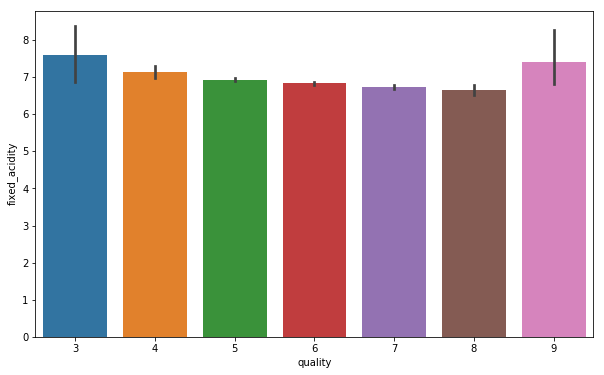

In [6]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed_acidity', data = wine_white)

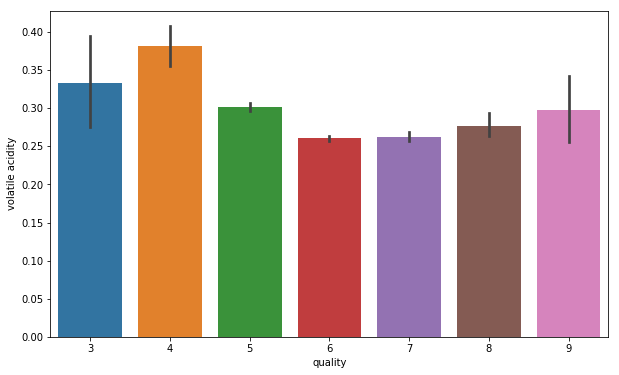

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine_white)

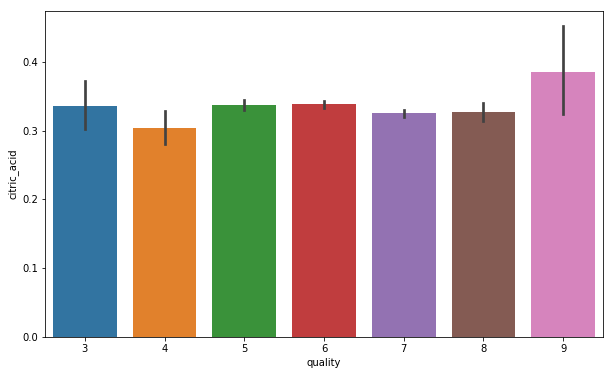

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric_acid', data = wine_white)

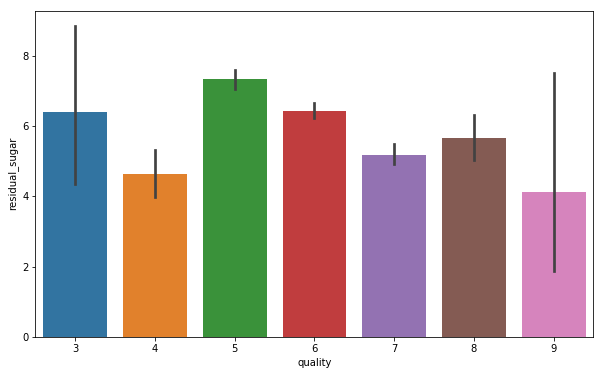

In [9]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual_sugar', data = wine_white)

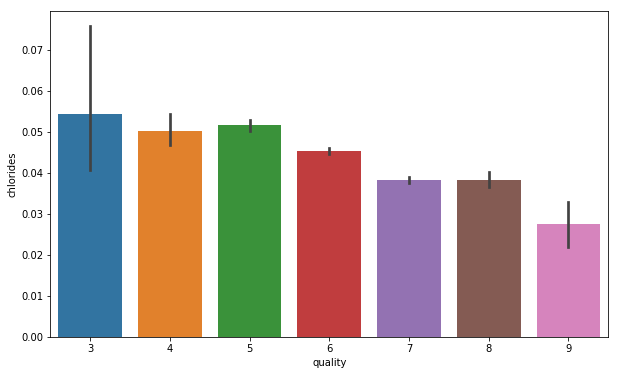

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine_white)

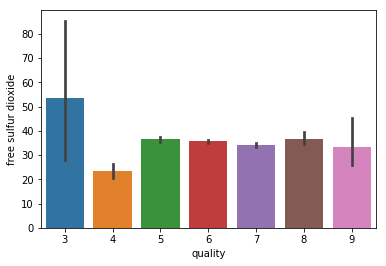

In [11]:
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine_white)


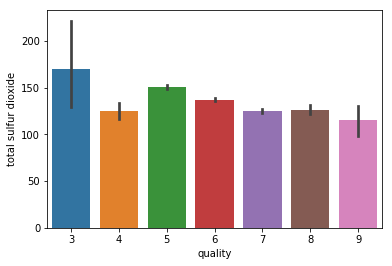

In [12]:
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine_white)


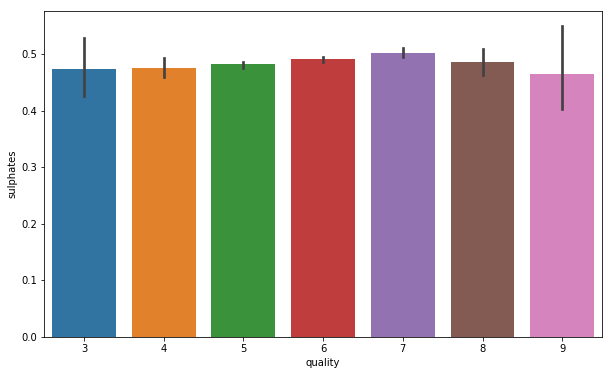

In [13]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine_white)

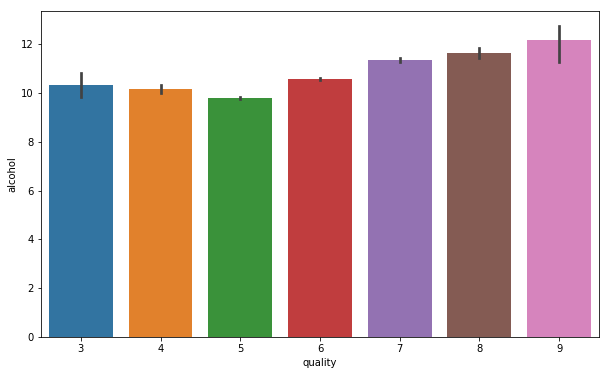

In [14]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine_white)

In [15]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [16]:
wine_white.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,4898.0,6.855,0.844,3.800,6.300,6.800,7.300,14.200
volatile acidity,4898.0,0.278,0.101,0.080,0.210,0.260,0.320,1.100
citric_acid,4898.0,0.334,0.121,0.000,0.270,0.320,0.390,1.660
residual_sugar,4898.0,6.391,5.072,0.600,1.700,5.200,9.900,65.800
chlorides,4898.0,0.046,0.022,0.009,0.036,0.043,0.050,0.346
free sulfur dioxide,4898.0,35.308,17.007,2.000,23.000,34.000,46.000,289.000
total sulfur dioxide,4898.0,138.361,42.498,9.000,108.000,134.000,167.000,440.000
density,4898.0,0.994,0.003,0.987,0.992,0.994,0.996,1.039
pH,4898.0,3.188,0.151,2.720,3.090,3.180,3.280,3.820
sulphates,4898.0,0.490,0.114,0.220,0.410,0.470,0.550,1.080


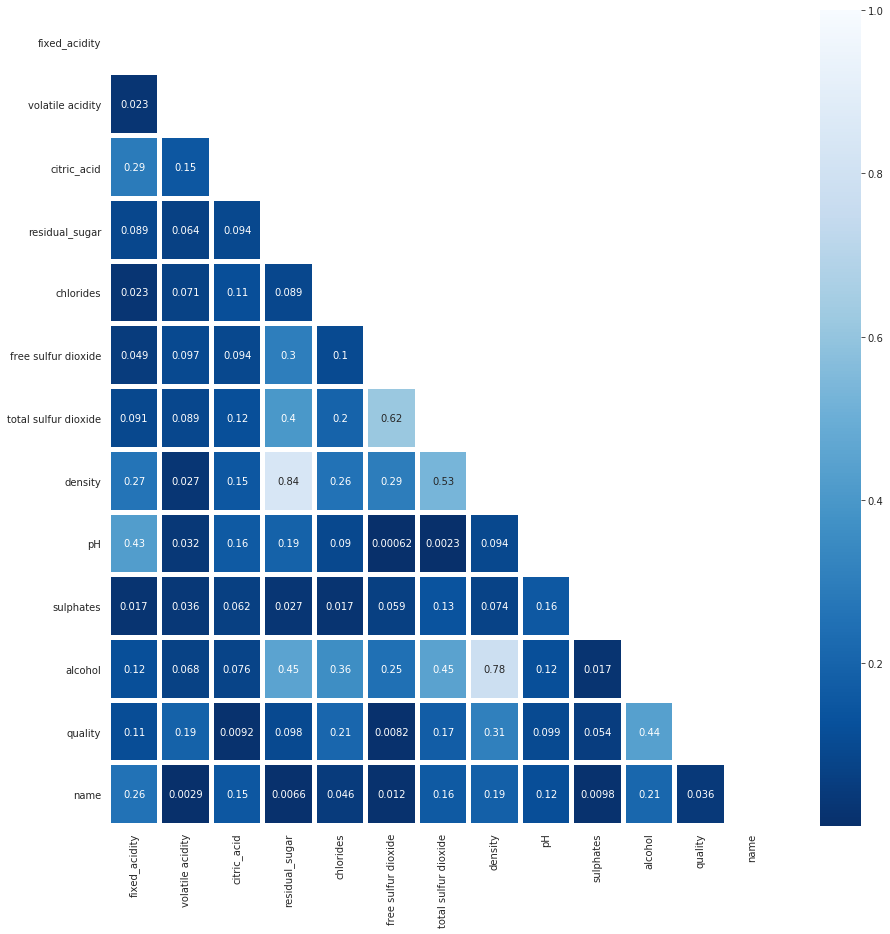

In [25]:
plt.figure(figsize=(15,15))
mask = np.zeros_like(wine_white.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(wine_white.corr().abs(), annot=True, linewidths=4, cmap='Blues_r', mask=mask)

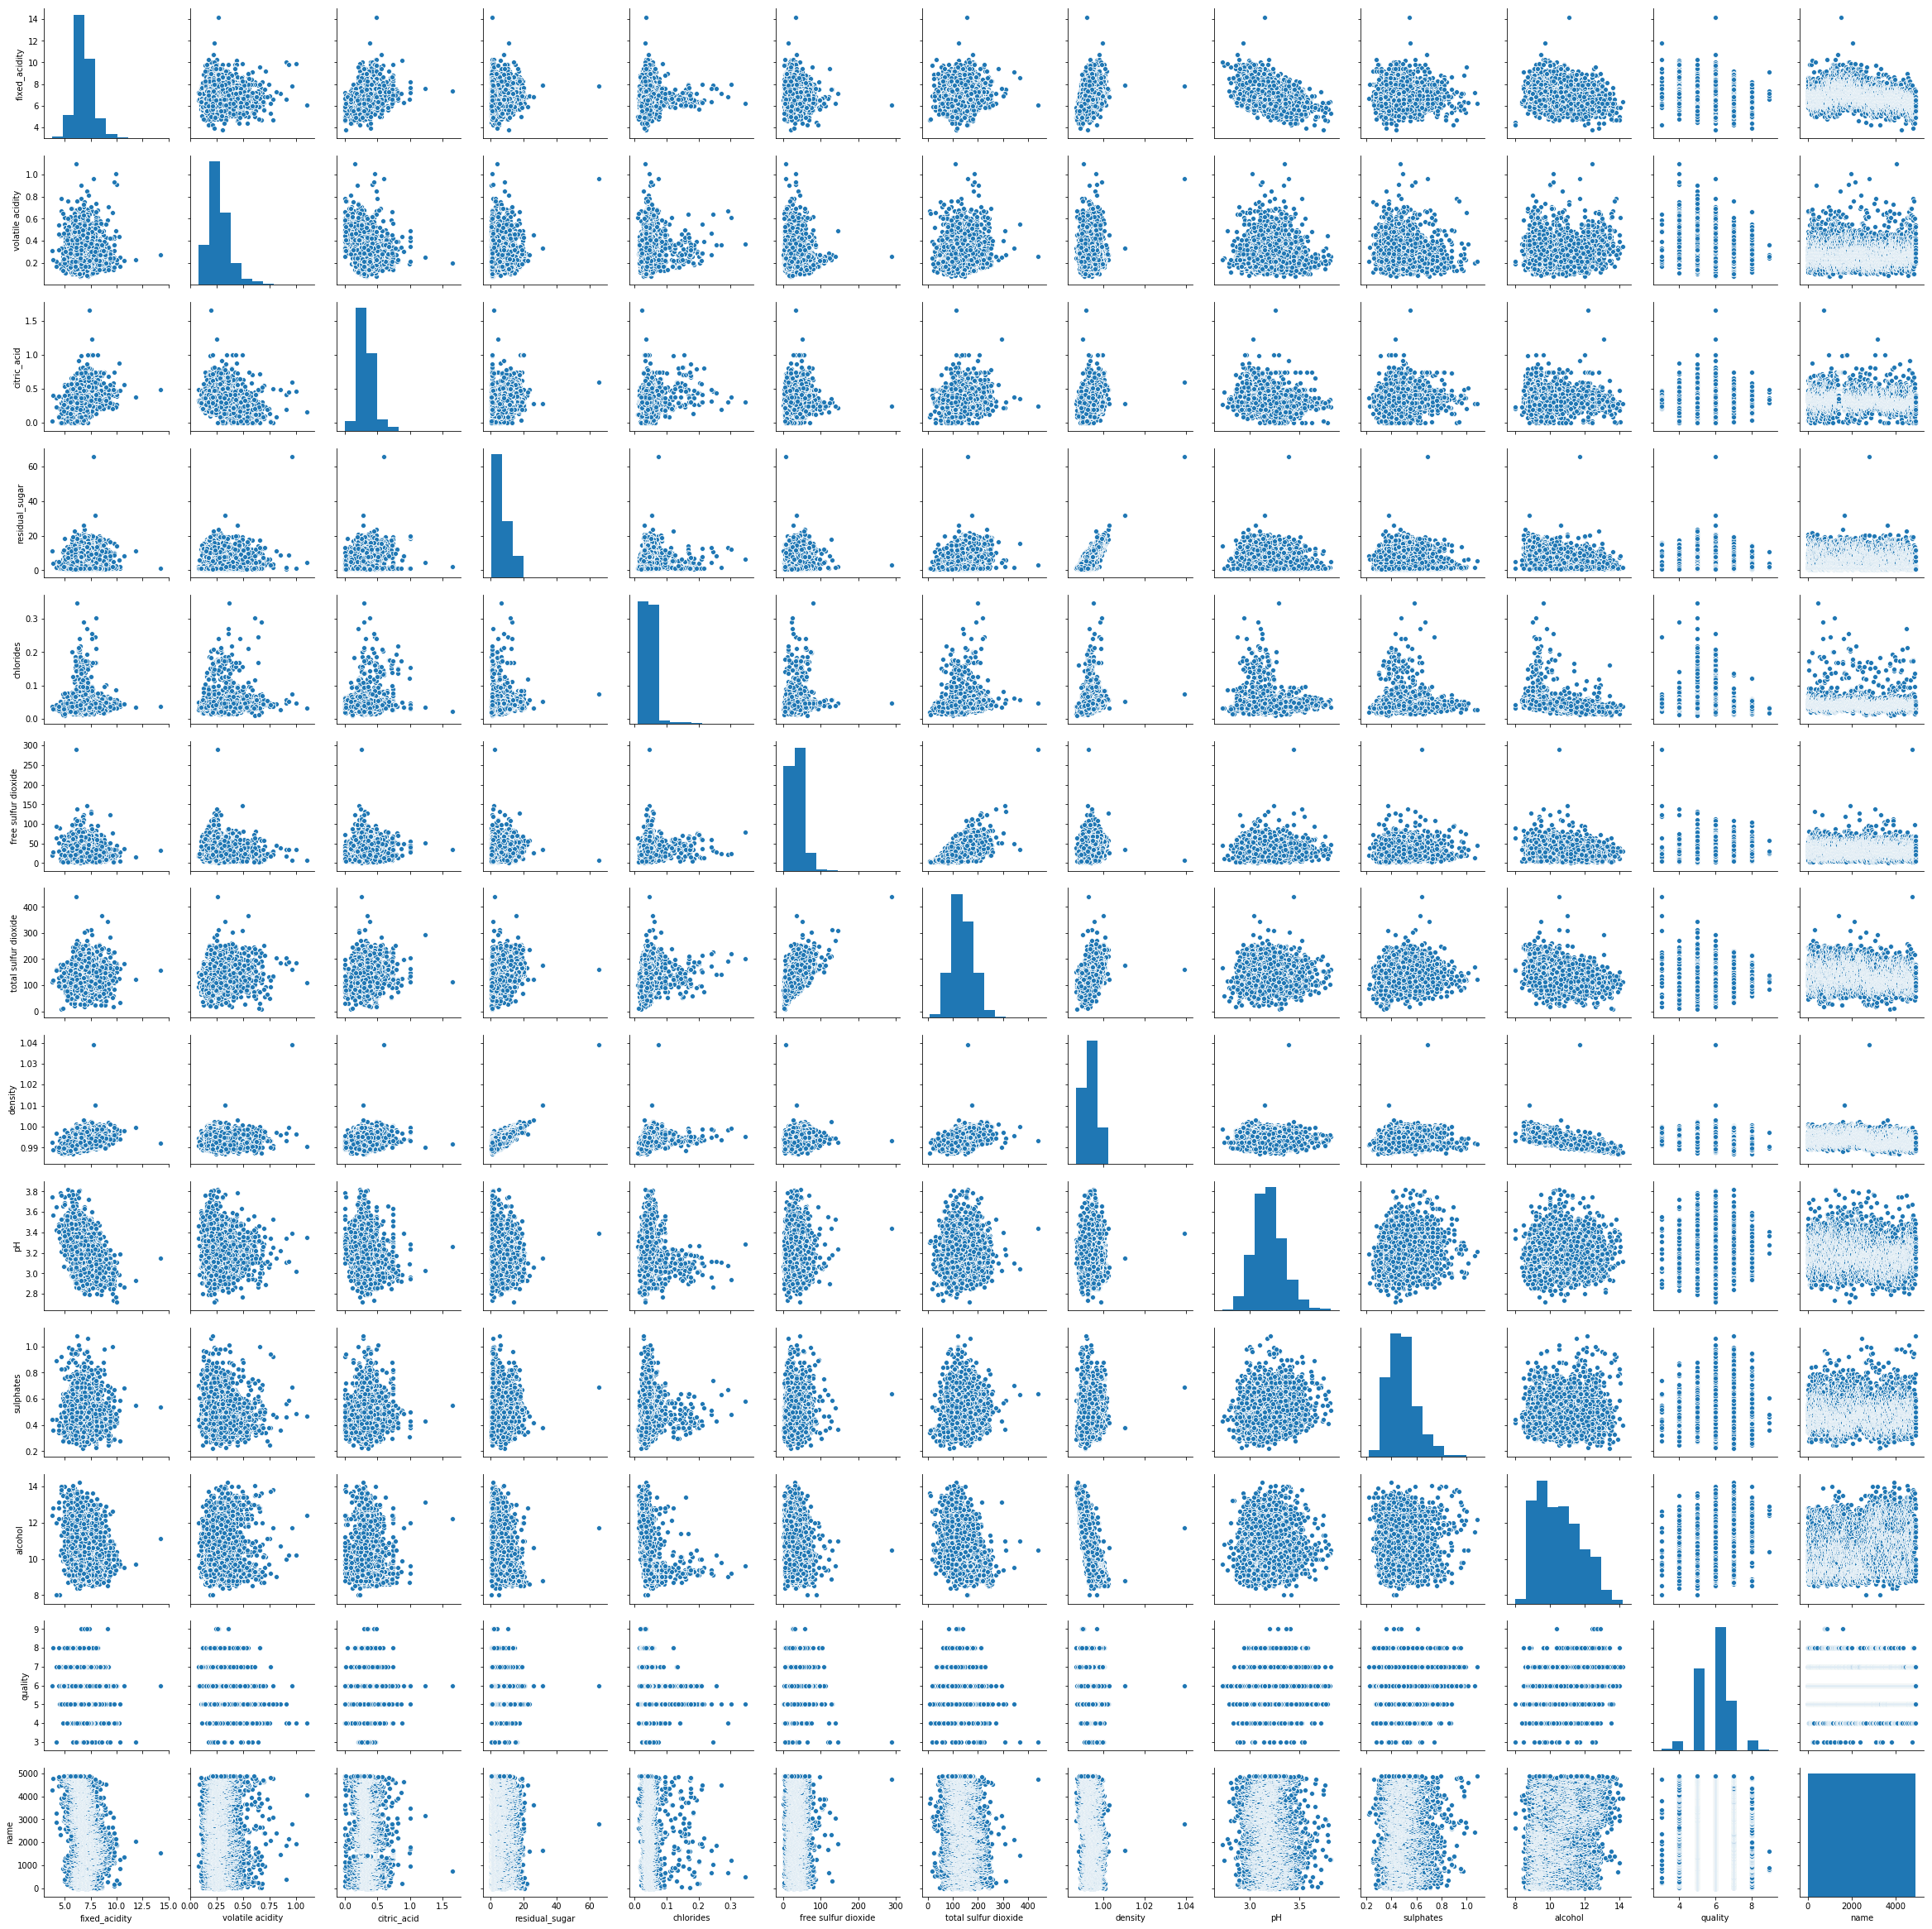

In [26]:
sns.pairplot(wine_white)

In [17]:
# L : 50% 이하 M :50% 초과 Q3이하 H : Q3 이상
# 알콜 농도 알코올 도수와 관련이 있다고 생각함
def alcohol_group(x):   
    if x <= 10.4:
        qg = "L"
    elif (x > 10.4) & (x <= 11.4):
        qg = "M"
    else:
        qg = "H"
    return qg  
wine_white['alcoholgroup'] = wine_white.alcohol.apply(alcohol_group)
wine_white.head()

,fixed_acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcoholgroup
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,L
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,L
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,L
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L


In [18]:
wine_white_df = wine_white.iloc[:4898,:]
donut= wine_white.alcoholgroup.value_counts()
labels = wine_white.alcoholgroup.value_counts().index

#Creat figure
fig = {
    "data":
    [
        {
            "values": donut,
            "labels": labels,
            "domain": {"x": [0, 1]},
            "name": "Quality Rate",
            "hoverinfo": "label+percent+name",
            "hole": .4,
            "type": "pie"
        }, 
    ],
    "layout":
    {
        "title":"Composition of wine quality",
        "annotations":
        [
            { 
                "font":{"size":20},
                "showarrow":False,
                "text": "",
                "x": 0,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [19]:
# L : 50% 이하 M :50% 초과 Q3이하 H : Q3 이상
# 당도는 잔류설탕과 관련이 있다고 생각함
def residual_sugar_group(x):   
    if x <= 5.2:
        qg = "L"
    elif (x > 5.2) & (x <= 9.9):
        qg = "M"
    else:
        qg = "H"
    return qg  
wine_white['residualsugar group'] = wine_white.residual_sugar.apply(residual_sugar_group)
wine_white.head()

,fixed_acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcoholgroup,residualsugar group
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,L,H
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,L,L
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,L,M
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M


In [30]:
# L : 50% 이하 M :50% 초과 Q3이하 H : Q3 이상
# 과일향은 구연산과 관련이 있다고 생각함
def citric_acid_group(x):   
    if x <= 0.32:
        qg = "L"
    elif (x > 0.32) & (x <= 0.39):
        qg = "M"
    else:
        qg = "H"
    return qg  
wine_white['citricacid group'] = wine_white.citric_acid.apply(citric_acid_group)
wine_white.head()

,fixed_acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcoholgroup,residualsugar group,citricacid group,name
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,L,H,M,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,L,L,M,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,L,M,H,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M,L,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M,L,4


In [31]:
wine_white['name'] = np.arange(4898)

In [32]:
wine_white.head()

,fixed_acidity,volatile acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcoholgroup,residualsugar group,citricacid group,name
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,L,H,M,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,L,L,M,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,L,M,H,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M,L,3
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,L,M,L,4


In [33]:
wine_white.columns

Index(['fixed_acidity', 'volatile acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'alcoholgroup',
       'residualsugar group', 'citricacid group', 'name'],
      dtype='object')

In [44]:
from collections import Counter

scale_var_char = ['alcoholgroup','residualsugar group', 'citricacid group']
for v_var in scale_var_char:
    print('wine에서', v_var,'의 L,M,H 분포',Counter(wine_white[v_var]))

wine에서 alcoholgroup 의 L,M,H 분포 Counter({'L': 2573, 'M': 1190, 'H': 1135})
wine에서 residualsugar group 의 L,M,H 분포 Counter({'L': 2469, 'M': 1218, 'H': 1211})
wine에서 citricacid group 의 L,M,H 분포 Counter({'L': 2687, 'H': 1132, 'M': 1079})


In [23]:
wine_white.iloc[:,13]

0       H
1       L
2       M
3       M
4       M
5       M
6       M
7       H
8       L
9       L
10      L
11      L
12      L
13      L
14      H
15      L
16      L
17      L
18      L
19      M
20      L
21      L
22      L
23      L
24      L
25      M
26      L
27      M
28      L
29      L
       ..
4868    L
4869    H
4870    M
4871    L
4872    H
4873    L
4874    L
4875    L
4876    L
4877    L
4878    L
4879    M
4880    M
4881    H
4882    L
4883    L
4884    M
4885    M
4886    M
4887    L
4888    L
4889    H
4890    L
4891    L
4892    L
4893    L
4894    M
4895    L
4896    L
4897    L
Name: residualsugar group, Length: 4898, dtype: object

In [24]:
for idx, wine in enumerate(list(wine_white.iloc[:,13])):
    if wine in ['L']:
        wine_white.iloc[idx,5] 

